In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, ifft
from scipy.special import gamma
import math
import scipy
import scipy.signal
import scipy.special
import time
import neurokit2 as nk


In [14]:
#Computing the Short Time-Frequecy Transform (STFT)

def STFT(x, Y):
    N = len(x)
    t = np.arange(1, N + 1)
    e = np.exp((2 / N) * np.pi * 1j * (t - 1))

    X1 = np.zeros((N, N), dtype=complex)

    for j in range(N):
        Z = np.roll(Y, j)
        X1[j-1,:] = scipy.fftpack.fft(x * np.conj(Z)) * (e ** (j-1))


    return X1


In [16]:
#computing instanteneous frequency

def IFT(X, x):
    N = len(x)
    omega = np.zeros((N, N), dtype=complex)

    for l in range(1,N):
        for j in range(1,N+1):
            if X[l-1, j-1] == 0:
                omega[l-1, j-1] = 0
            else:
                omega[l-1, j-1] = np.log(X[l , j-1] /X[l-1, j-1])
                omega[l-1, j-1] = round(np.real(((N / (2 * np.pi * 1j )) * omega[l-1, j-1])))

    for j in range(1,N+1):
        if X[N -1, j-1] == 0:
            omega[N - 1, j-1] = 0
        else:
            omega[N - 1, j-1] = np.log(X[0, j-1] / X[N - 1, j-1])
            omega[N - 1, j-1] = round(np.real((N / (2 * np.pi * 1j )) * omega[N - 1, j-1]))

    return omega


In [18]:
def SynSTFT(X, x, omega):
    N = len(x)
    X2 = np.zeros((N, N), dtype=complex)

    for k in range(N):
        for j in range(N):
            X2[k, j] = np.sum(X[k, :] * (j- np.abs(omega[k, :])==0))

    return X2


In [24]:
#window function
def wind(o,n): #o:support, n:length of window
    Ye1 = np.hanning(o)
    Ye = np.roll(Ye, n-round(o/2))
    Y = ifft(Ye)
    return Y


In [31]:
N = 1000  # Example value, replace with the desired length
o = 27

#window function
Ye1 = np.hanning(o)
Ye = np.concatenate((Ye1, np.zeros(N - o)))

Ye = np.roll(Ye, N-round(o/2))

Y = ifft(Ye)
#defining signals
#Example1:
Hz = 32
t = np.arange(1 , 32*32+1 , 1 )
x = np.cos(2 * np.pi * (4 * (t/32) + np.cos(t /(2*32))))

x1=x[0:1000]

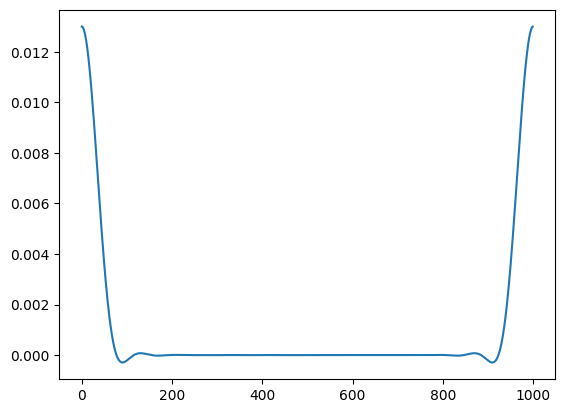

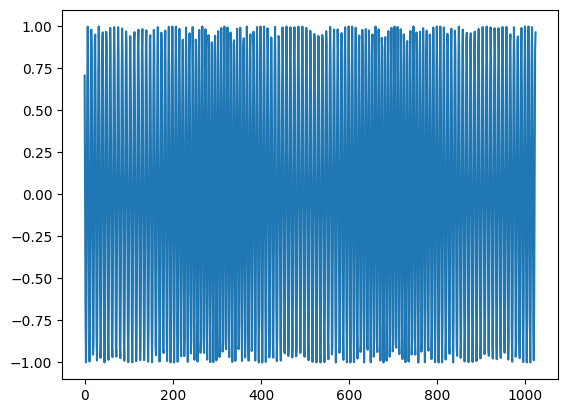

In [32]:
plt.plot(Y, label='Original Window')
plt.show()
plt.plot(x, label='Original signal')
plt.show()

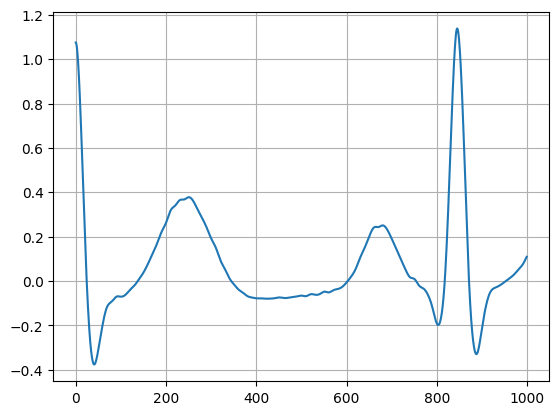

In [33]:
#Example2:
ecg = nk.ecg_simulate(duration=10, heart_rate=70)
ecg1=ecg[0:1000]
plt.plot(ecg1)
plt.grid(True)
plt.show()

In [49]:
t7=time.time()
STq=STFT(ecg1,Y)
t8=time.time()
SynSTq=SynSTFT(STFT(ecg1,Y),ecg1,IFT(STFT(ecg1,Y),ecg1))
t9=time.time()
STqx=STFT(x1,Y)
t10=time.time()
SynSTqx=SynSTFT(STFT(x1,Y),ecg1,IFT(STFT(x1,Y),x1))
t11=time.time()

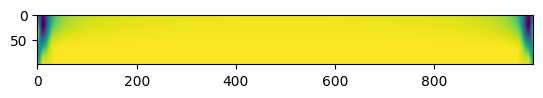

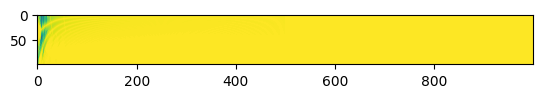

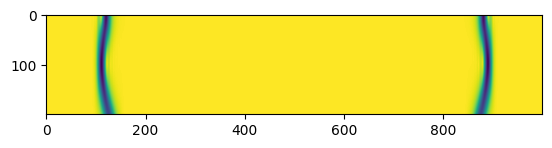

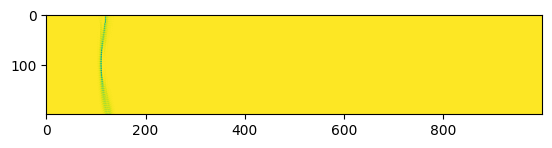

In [50]:
plt.imshow(0.5-np.abs(STq.T)[0:100,:], cmap='viridis')
plt.show()
plt.imshow(0.5-np.abs(SynSTq[0:100,:]), cmap='viridis')
plt.show()
plt.imshow(0.5-np.abs(STqx)[0:200,:], cmap='viridis')
plt.show()
plt.imshow(0.5-np.abs(SynSTqx[0:200,:]), cmap='viridis')
plt.show()